# 데이터와 표본분표
<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import tmean, scoreatpercentile
import seaborn as sns
import os
import numpy as np
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import scipy as sp
import scipy.stats

<br>
## 1.표본분포
<br>

* 하나의 동일한 모집단에서 얻은 여러 샘플에 대한 표본통계량 분포를 의미한다 <br>
* 표본을 통해 추정,모델을 하기 때문에 다른 표본을 뽑는다면 다른 결과를 얻을수도 있다. 따라서 어떤 표본을 뽑는가에 따라 결과가 얼마나 달라질지에 대한 예측(표본 변동성)이 필요하다

In [5]:
samp_data = pd.read_csv('loans_income.csv')

(Text(0.5,0,'Data'), Text(0,0.5,'Count'))

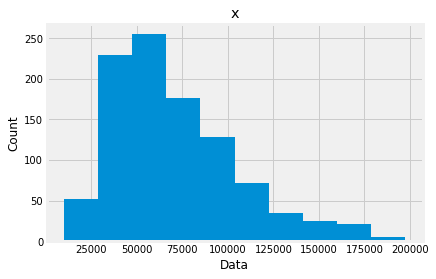

In [4]:
## 모집단의 분포 살펴보기

## 1.1 모집단에서 1000개를 랜덤추출
samp_data.sample(n=1000).hist()  # random sampling 
plt.xlabel('Data'),plt.ylabel('Count')

(Text(0.5,0,'Data'), Text(0,0.5,'Count'))

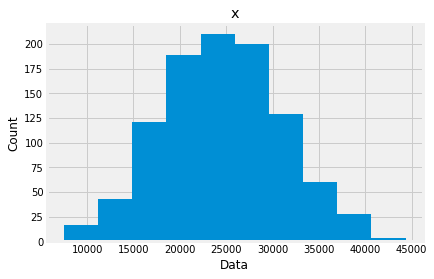

In [5]:
## 1.2 모집단에서 추출한 5개값의 평균 1000개
sampled_data1 = []
for i in range(1000): 
    ##arr = np.arange(len(samp_data)) ## np.random.choice 위해 이 과정 필요 혹은 아래
    sampled_data1.append(np.random.choice(len(samp_data),5).mean())  ## 모집단에서 5개 추출한 것들의 평균

sampled_temp = pd.DataFrame({'x':sampled_data1}) ## 리스트에러피하기위한코드 ## 리스트를 dataframe로 변환시켜버림
sampled_temp.sample(n=1000).hist()
plt.xlabel('Data'),plt.ylabel('Count')

(Text(0.5,0,'Data'), Text(0,0.5,'Count'))

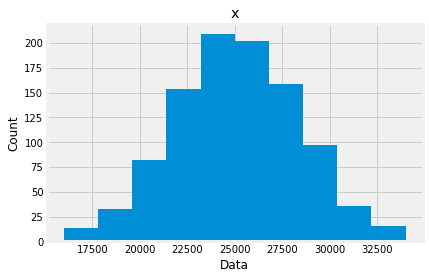

In [6]:
## 1.3 모집단에서 추출한 20개값의 평균 1000개
sampled_data2 = []
for i in range(1000):
    sampled_data2.append(np.random.choice(len(samp_data),20).mean())

sampled_temp2 = pd.DataFrame({'x':sampled_data2})

sampled_temp2.sample(n=1000).hist()
plt.xlabel('Data'),plt.ylabel('Count')

* <b> 중심극한 정리 </b>
> 위 3가지 그래프에 따르면, 모집단이 정규분포를 따르지 않더라도 <br>
> 표본크기가 충분하고 데이터가 정규성을 크게 이탈하지 않는 경우, 여러 표본에서 추출한 평균은 종 모양의 정규곡선을 따른다

<br>
#### 2.1 표준오차 
<br> 

> 표준오차는 통계에 대한 표본분포의 변동성을 한마디로 말해주는 단일 측정 지표이다. <br>
* <b>표준오차 측정시 고려사항</b> <br>
* 1. 모집단에서 완전히 새로운 샘플들을 많이 수집한다 <br>
* 2. 각각의 새 샘플에 대해 통계량을 계산한다 <br>
* 3. 2단계에서 얻은 통계량의 <b>표준편차</b>를 계산한 후 표준오차의 추정치로 사용한다.

<br>
#### 2.2 부트스트랩
<br>

> 표본분포를 측정하는 효과적인 방법 부트스트랩 <br>
> 현재 있는 표본에서 추가적으로 표본을 <b>복원추출</b>하고 각 표본에 대한 통계량과 모델을 다시 계산하는 것 <br>
> " 랜덤한 표본을 수 없이 많이(복원추출) 얻기 위해"
<br>

1. 샘플 값을 하나 뽑아서 기록하고 <b> 제자리에 놓는다 </b>
2. n번 반복한다 
3. 재표본추출된 값의 평균을 기록한다
4. 1~3단계를 R번 반복한다
5. R개의 결과를 사용하여
        a. 그것들의 표준편차(표본평균의 표준오차)를 계산한다
        b. 히스토그램 또는 상자그림을 그린다
        c. 신뢰구간을 찾는다
        
<br>

> 다변량 데이터에도 적용될 수 있다. 이때에 각 행은 여러 변수들의 값을 포함하는 하나의 샘플을 의미한다 <br>
> 예측 모델 적용 시, 여러 부트스트랩 표본들로부터 얻은 예측값을 모아서 결론을 내는것(배깅)이 단일 모델을 사용하는 것보다 좋다
<br>

* <b> 부트스트랩은 표본크기가 작은것을 보완하기 위한 것이 아니다 </b> <br>
* <b> 항상 관측된 데이터로부터 복원추출한다는것을 의미한다 </b>
        

In [4]:
##bootstrap

# len(data)개의 항목을 복원추출로 무작위 재추출
def bootstrap_sample(data):
    return [np.random.choice(data) for i in data] #이 함수는 추출만 함!(랜덤)

In [27]:
sampled_data1 = np.random.choice(samp_data['x'],100,replace=True)  ## 우선 표본을 한번 구한다. (100명 표본) # 복원추출

boot_list = []

for i in range(10000): ## 부트스트랩 1만번 돌리기 
#     100명 표본데이터에서 100명을 "복원추출"하는것을 1만번 반복하기
    boot_list.append(np.random.choice(sampled_data1,100,replace=True).mean()) ## 부트스트래핑한 결과를 리스트에 저장 !!! (여기서는 부트스트래핑 데이터의 mean값)
# boot_list    


<br>

#### * np.random.choice() 

<br> 

<b> np.random.choice(a, size=None, replace=True, p=None) </b>

<br>

* a : 데이터를 넣어주면 된다. 배열이면 원래의 데이터, <b>정수이면 range(a) 명령으로 데이터 생성</b>
* return type : array type
* size : 정수. 샘플 숫자 shape으로 넣으면 매트릭스를 생성
* replace : 중복의 허용 여부. 불리언. True이면 한번 선택한 데이터를 다시 선택 가능
* p : 배열. 각 데이터가 선택될 수 있는 확률

<br>

#### * sample()

<br>

<b> sample함수도 랜덤하게 표본을 추출해주는 기능이다. 단, return 형태가 dataFrame(series?)형태로 반환됨

<br>

#### *  파이썬 _(언더스코어) 의 의미

<br>

* 인터프리터(Interpreter)에서 마지막 값을 저장할 때
* 값을 무시하고 싶을 때 (흔히 “I don’t care”라고 부른다.)
* 변수나 함수명에 특별한 의미 또는 기능을 부여하고자 할 때
* 국제화(Internationalization, i18n)/지역화(Localization, l10n) 함수로써 사용할 때
* 숫자 리터럴값의 자릿수 구분을 위한 구분자로써 사용할 때

<br>
## 2. 신뢰구간
<br> 

> 단일 수치가 아닌 어떤 범위로 추정치를 제시 <br> 
> 90% 신뢰구간이란, 표본통계량의 부트스트랩 표본분포의 90%를 포함하는 구간 <br>
> 즉, x% 신뢰구간이란, 평균적으로 유사한 표본추정치 x%정도가 포함되어야 한다 <br>
<br>

* <b> 부트스트랩 신뢰구간을 구하는 법 </b>
* 1. 부트스트래핑
* 2. x% 신뢰구간을 구하기 위해, 부트스트래핑 결과로부터 양쪽 끝에서 [(100-x) / 2]%만큼 잘라낸다
* 3. 절단한 점들은 x% 부트스트랩 신뢰구간의 양 끝점이다
<br>

> 신뢰구간과 관련된 백분율을 신뢰수준이라고 부른다 <br>
> 신뢰수준이 높을수록 신뢰 구간이 더 넓어지며, 표본이 작을수록 신뢰구간이 넓어진다

In [28]:
## 부트스트래핑 신뢰구간 구하기
## 위에서 부트스트래핑한 데이터 토대로
np.percentile(boot_list, 0.5), np.percentile(boot_list, 99.5)

(59256.97695, 75320.19424999999)

<br>
## 3. 정규분포
<br>

> Normal Distribution <br>
> 표준정규 분포 : x 축의 단위가 표준편차로 표현되는 정규분포 <br>
> 데이터를 표준정규분포와 비교하려면 데이터에서 평균을 뺀 다음 표준편차로 나누면 된다. => <b>"표준화"</b> <br>
> 표준화한 값을 z-Score라고 하며 , 정규분포를 z-분포라고도 한다 <br>

<br>

* <b> 정규분포를 따를 것이라는 가정은, 자주 일어나지 않는 예외 경우에 관한 과소평가를 가져올 수 있다. </b>

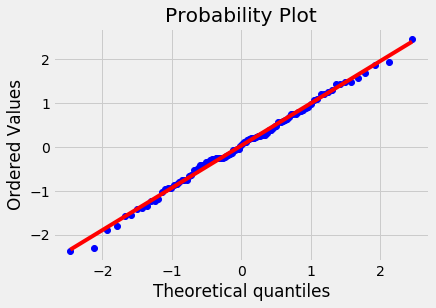

In [30]:
## 표본이 정규분포에 얼마나 가까운지를 시각적으로 판별하는 QQ그림
## z-Score를 오름차순으로 정렬하고 각 값의 z-Score Y축에 표시한다. (X축은 정규분포에서의 해당 분위수)
## 점들이 대각선에 가까운 형태로 나타나면 정규분포에 가까운것으로 간주할 수 있다.
import pylab 
import scipy.stats as stats

## 정규분포 데이터 생성하기
mean=0  ## 표준정규분포의 평균은0
std=1   ## 표준편차는 1
normal_D = np.random.normal(mean,std,100)

stats.probplot(normal_D, dist="norm", plot=pylab) ##생성된 정규분포 데이터에 의한 QQ plot 생성
pylab.show()

((array([-4.19138481, -3.98563638, -3.8734641 , ...,  3.8734641 ,
          3.98563638,  4.19138481]),
  array([  4000,   6900,   7000, ..., 198425, 199000, 199000], dtype=int64)),
 (31750.406851607877, 68760.51843999999, 0.9658085995476668))

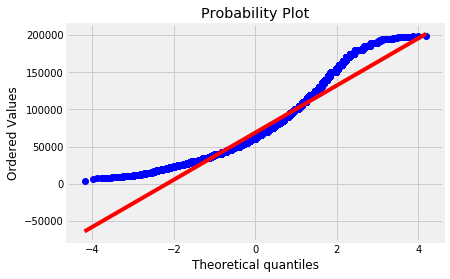

In [9]:
## samp_data 예시
stats.probplot(samp_data['x'], dist="norm", plot=pylab)

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([55330.87, 56068.15, 56484.78, ..., 78366.13, 78491.6 , 79054.95])),
 (3150.6001666209795, 66984.595451, 0.9996668203399022))

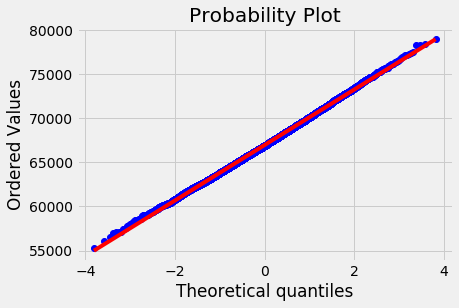

In [32]:
## 부트스트래핑한 데이터의 QQ plot
stats.probplot(boot_list, dist="norm", plot=pylab)

<br>
## 4. 긴꼬리 분포
<br>

> "데이터는 일반적으로 정규분포를 따르지 않는다" <br>
> 데이터는 긴꼬리(long tail)을 가질 수 있다. (분포의 꼬리는 양 극한값에 해당한다) <br>

<br>

* 꼬리(tail) : 적은 수의 극단값이 주로 존재하는, 도수분포의 길고 좁은 부분
* 왜도(skewness) : 분포의 한쪽 꼬리가 반대쪽 다른 꼬리보다 긴 정도 
<br>

In [17]:
## 넷플릭스의 일일 주식 수익률

nflx = pd.read_csv('sp500_data.csv')

In [18]:
nflx = nflx['NFLX']

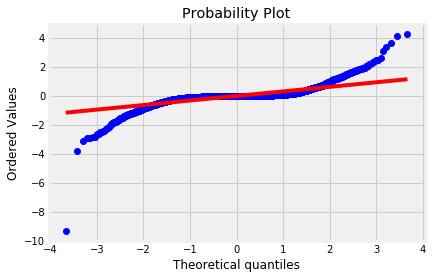

In [20]:
## 넷플릭스 주식수익률에 대한 QQ plot
stats.probplot(nflx, dist="norm", plot=pylab)
pylab.show()

<br>
## 5. 이항분포
<br>

> 이항 결과는 중요한 결정 사항들(생존 or 죽음)을 나타내기 때문에, 모델을 만드는데 매우 중요하다 <br>
> 이항 시행은 두 가지 결과 p , (1-p) <br>
> n이 크고 p가 0 또는 1에 너무 가깝지 않은 경우, <b> 정규분포로 근사할 수 있다 </b>

<br>

* 꼭 50대 50의 확률을 가질 필요는 없으며 확률의 합이 1.0이 되면 된다. <br>
* 통계에서는 통상적으로 1이 "성공"을 의미하며 덜 나오는 결과에 1을 지정하는 것이 일반적이다
* <b> 각 시행마다 성공확률(p)이 정해져 있을 때, 주어진 시행 횟수(n) 중에서 성공한 횟수(x)의 도수분포를 의미한다. </b>

<br>

* 이항분포의 평균은 n * p 이다.
* 분산은 n*p(1-p)이다
* *이항분포의 평균과 분산으로 근사화한 정규분포를 주로 사용(시행횟수가 충분하거나 특히 p가 0.50에 가까운 경우)

In [32]:
## 0.5의 확률로 1번 시도했을 경우 성공한 "횟수"
n , p = 1,0.5
binom = np.random.binomial(n,p)
print(binom)

## # 0.5의 확률로 1000번 시도해서 성공한 "비율"
n,p = 1000,0.5
binom_possible = np.random.binomial(n,p)/n
print(binom_possible)


1
0.513


In [45]:
## 베르누이 시행
## 한번의 클릭이 판매로 이어질 확률이 0.02일때, 200회 클릭으로 0회 매출을 관찰할 확률은 얼마인가?

n,p,size = 200,0.02,0    ## n =시행횟수, p=성공확률,  size=성공횟수
binom_possible = sum(np.random.binomial(n,p,size)/n)
print(binom_possible)

0


<br>
## 6. 푸아송 분포
<br>

> 표집된 단위 시간 혹은 단위 공간에서 발생한 사건의 도수분표 <br>
> 시간 단위 또는 공간 단위로 표본들을 수집할 경우 그 사건들의 분포를 나타냄 <br>
> ex) 5초동안 서버에 도착한 트래픽을 95%의 확률로 완벽하게 처리하는 데 필요한 용량은 얼마일까? ( :대기행렬) <br>
> ex) 어느 특정지역에서 하루 동안 발생하는 교통사고 건 수 <br> 
> ex) 회사 교환대에 10분 동안 걸려오는 전화의 수
<br>

* <b> 푸아송 분포의 핵심 파라미터는 람다 </b>
* <b> 람다 => 단위 시간이나 단위 면적당 발생한 평균 사건 수 </b> <br>

<br>

* 푸아송 확률변수의 조건
 1. 구간마다 발생하는 사상은 <b>서로 독립이다.</b>
 2. 사상의 발생 확률은 구간의 길이에 비례한다.
 3. 아주 작은 구간에서 두 번 이상의 사상이 발생할 확률은 0 이다.

[Text(0,0.5,'Frequency'), Text(0.5,0,'Poisson')]

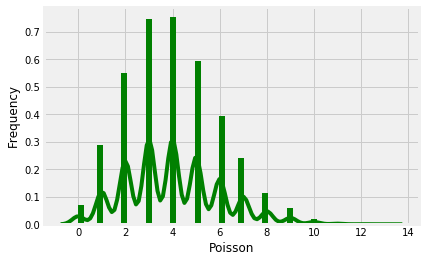

In [2]:
from scipy.stats import poisson
import seaborn as sb

## mu =lambda
data_binom = poisson.rvs(mu=4, size=10000)
ax = sb.distplot(data_binom,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')